In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

I found [_Is Your State Doing Enough Coronavirus Testing?_](https://www.nytimes.com/interactive/2020/us/coronavirus-testing.html?smtyp=cur) to be very compelling, but hard to conceptualize how many people would have to be tested every day to hit these estimated mitigation and suppression levels.

In [57]:
state = 'nc'
df =  daily = pd.read_json(
        f'https://covidtracking.com/api/v1/states/{state}/daily.json', convert_dates=['date'])

In [58]:
df["date"] = daily["date"].apply(str)
df["date"] = pd.to_datetime(daily["date"], format="%Y%m%d")
df = df.set_index(pd.DatetimeIndex(daily['date']))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2020-07-09 to 2020-03-04
Data columns (total 41 columns):
date                        128 non-null datetime64[ns]
state                       128 non-null object
positive                    128 non-null int64
negative                    120 non-null float64
pending                     2 non-null float64
hospitalizedCurrently       107 non-null float64
hospitalizedCumulative      0 non-null float64
inIcuCurrently              0 non-null float64
inIcuCumulative             0 non-null float64
onVentilatorCurrently       0 non-null float64
onVentilatorCumulative      0 non-null float64
recovered                   60 non-null float64
dataQualityGrade            120 non-null object
lastUpdateEt                120 non-null object
dateModified                120 non-null object
checkTimeEt                 120 non-null object
death                       116 non-null float64
hospitalized                0 non-null float64
dateCheck

In [59]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-07-09,2020-07-09,NC,79349,1042462.0,NaN,1034.0,NaN,NaN,NaN,NaN,...,1121811,20,0,2822dc792c5082916fc65b012790e875a73fa61c,0,0,0,0,0,
2020-07-08,2020-07-08,NC,77310,1019372.0,NaN,994.0,NaN,NaN,NaN,NaN,...,1096682,21,0,c9fa6f214d64e59fccbf57ee363ad7da37e65ffe,0,0,0,0,0,
2020-07-07,2020-07-07,NC,75875,995415.0,NaN,989.0,NaN,NaN,NaN,NaN,...,1071290,22,0,0ac280e88e7b9c62c5b9250994ab6d09f3287248,0,0,0,0,0,
2020-07-06,2020-07-06,NC,74529,977317.0,NaN,982.0,NaN,NaN,NaN,NaN,...,1051846,2,0,7f7ed768e16e91f9121e30c772fbcdcf2d5de36e,0,0,0,0,0,
2020-07-05,2020-07-05,NC,72983,963855.0,NaN,949.0,NaN,NaN,NaN,NaN,...,1036838,1,0,72ed9c33f8c0eed4ab6ff137d34e07b577974fc1,0,0,0,0,0,


104.9
2020-07-07 00:00:00


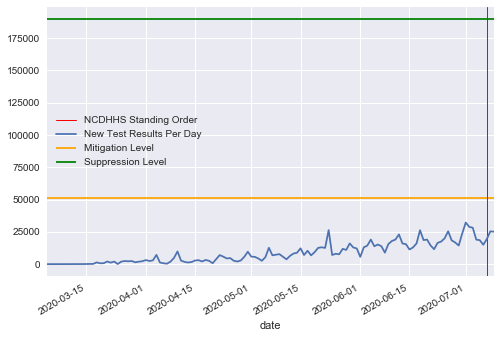

In [86]:
plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot()
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

totalNCPopulation = 10.49 * (10.0 ** 6.0)
groupsOf100k = totalNCPopulation / (10.0 ** 5.0)
print(groupsOf100k)
#https://globalepidemics.org/july-6-2020-state-testing-targets/
#489 per 100k people
mitigationTarget = (489 * groupsOf100k)

#1807 per 100k people
suppressionTarget = (1807 * groupsOf100k)

moreTesting = pd.to_datetime('20200707', format="%Y%m%d")

print(moreTesting)
ax.axvline(linewidth=1, color='r', x=moreTesting)
ax.hlines([mitigationTarget], min(df['date']), max(df['date']), color='orange', label="mitigation")
ax.hlines([suppressionTarget], min(df['date']), max(df['date']), color='green', label="suppression")


df.plot(y='totalTestResultsIncrease', x='date', ax=ax).legend(
    ['NCDHHS Standing Order', 'New Test Results Per Day', 'Mitigation Level', 'Suppression Level'], loc='center left')

NC DHHS issued a standing order on July 7, 2020 to reduce the barriers to getting tested for COVID19.

[Press Release](https://www.ncdhhs.gov/news/press-releases/north-carolina-announces-statewide-covid-19-test-standing-order-requires)

It's not exactly clear what the big change is, but maybe it has something to do with them allowing people who protested to get tested.